# Perceptron

## Var 1

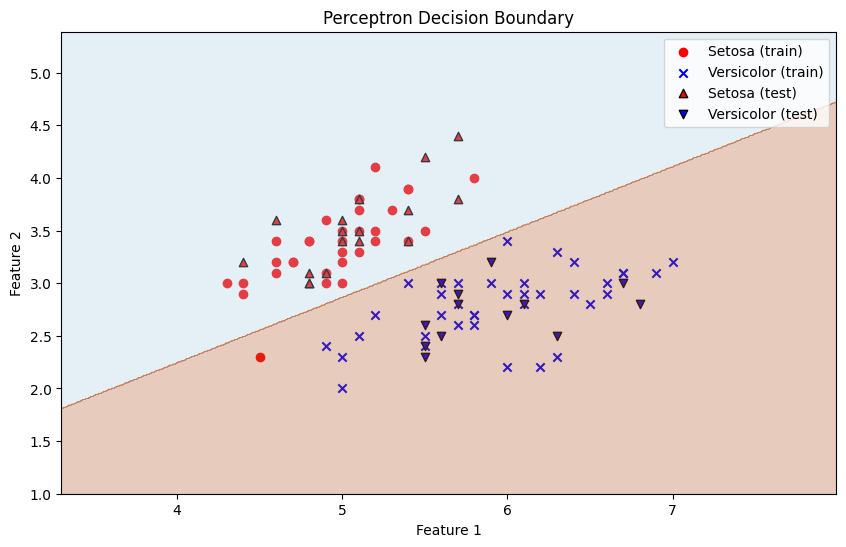

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

iris = load_iris()
X = iris.data[:, 0:2]  # Use only the first two features
y = iris.target

# Select only Setosa and Versicolor classes
X = X[y != 2]
y = y[y != 2]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

plt.figure(figsize=(10, 6))

# Plot training data
plt.scatter(X_train[y_train == 0, 0], X_train[y_train == 0, 1], color='red', marker='o', label='Setosa (train)')
plt.scatter(X_train[y_train == 1, 0], X_train[y_train == 1, 1], color='blue', marker='x', label='Versicolor (train)')

# Plot testing data
plt.scatter(X_test[y_test == 0, 0], X_test[y_test == 0, 1], color='red', marker='^', edgecolor='k', label='Setosa (test)')
plt.scatter(X_test[y_test == 1, 0], X_test[y_test == 1, 1], color='blue', marker='v', edgecolor='k', label='Versicolor (test)')

perceptron = Perceptron(max_iter=100, tol=1e-3, random_state=42)
perceptron.fit(X_train, y_train)

# Plot decision boundary
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
Z = perceptron.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.Paired)

plt.title('Perceptron Decision Boundary')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

In [ ]:
import numpy as np
from collections import Counter

class Perceptron:

    def __init__(self, weights, learning_rate=0.1):
        self.weights = np.array(weights)
        self.learning_rate = learning_rate

    @staticmethod
    def unit_step_function(x):
        return 0 if x < 0 else 1

    def __call__(self, in_data):
        weighted_sum = np.dot(self.weights, in_data)
        return Perceptron.unit_step_function(weighted_sum)

    def fit(self, target_result, calculated_result, in_data):
        in_data = np.array(in_data)
        error = target_result - calculated_result
        if error != 0:
            correction = error * in_data * self.learning_rate
            self.weights += correction

    def evaluate(self, data, labels):
        evaluation = Counter()
        for index in range(len(data)):
            label = int(round(self(data[index]), 0))
            if label == labels[index]:
                evaluation["correct"] += 1
            else:
                evaluation["wrong"] += 1
        return evaluation


p = Perceptron(weights=[0.1, 0.1], learning_rate=0.3)

for index in range(len(X_train)):
    p.fit(y_train[index],  p(X_train[index]),  X_train[index])

evaluation = p.evaluate(X_train, y_train)
print(evaluation.most_common())
evaluation = p.evaluate(X_test, y_test)
print(evaluation.most_common())

print(p.weights)

[('correct', 67), ('wrong', 3)]
[('correct', 29), ('wrong', 1)]
[ 1.75 -3.26]
